# Capstone 1. Data Wrangling

## #Current 2021/2022 Tax Years: Residential Sales
Base Period Sales from July 1, 2018–June 30, 2020
In areas with few sales, the Assessor is allowed to use comparable sales going back up to five years.

https://bouldercounty.gov/property-and-land/assessor/sales/comps-2021/residential/

### Single Family Residential Properties <br>
Sales of single family homes, duplexes, and triplexes.
Market Area Maps for Single Family Properties
Comparable properties are often found in the same Market Area, which are groups of neighborhoods that have similar trends in the market. Boulder County uses these areas to establish market value for mass appraisal purposes.

## 1. Data Collection

 #### Load the packages

In [53]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


#### Data Loading 

In [54]:
gunbarrel = pd.read_excel('data/ar-comp-2021-residential-401-sheet.xlsx',sheet_name='2021 Market Area 401' )
superior = pd.read_excel('data/ar-comp-2021-residential-402-sheet.xlsx',sheet_name='2021 Market Area 402')
louisville = pd.read_excel('data/ar-comp-2021-residential-403-sheet.xlsx',sheet_name='2021 Market Area 403')
erie = pd.read_excel('data/ar-comp-2021-residential-404-sheet.xlsx',sheet_name='2021 Market Area 404')
lafayette = pd.read_excel('data/ar-comp-2021-residential-405-sheet.xlsx',sheet_name='2021 Market Area 405')

boulder1 = pd.read_excel('data/ar-comp-2021-residential-101-sheet.xlsx',sheet_name='2021 Market Area 101')
boulder2 = pd.read_excel('data/ar-comp-2021-residential-102-sheet.xlsx',sheet_name='2021 Market Area 102')
boulder3 = pd.read_excel('data/ar-comp-2021-residential-103-sheet.xlsx',sheet_name='2021 Market Area 103')
boulder4 = pd.read_excel('data/ar-comp-2021-residential-104-sheet.xlsx',sheet_name='2021 Market Area 104')
boulder5 = pd.read_excel('data/ar-comp-2021-residential-105-sheet.xlsx',sheet_name='2021 Market Area 105')
boulder6 = pd.read_excel('data/ar-comp-2021-residential-106-sheet.xlsx',sheet_name='2021 Market Area 106')
boulder7 = pd.read_excel('data/ar-comp-2021-residential-107-sheet.xlsx',sheet_name='2021 Market Area 107')

In [55]:
print(gunbarrel.shape, superior.shape, louisville.shape, erie.shape, lafayette.shape)
print(boulder1.shape,
      boulder2.shape, boulder3.shape, boulder4.shape, boulder5.shape, boulder6.shape, boulder7.shape)


(706, 23) (817, 23) (1321, 23) (1847, 23) (2389, 23)
(518, 23) (628, 23) (622, 23) (298, 23) (559, 23) (548, 23) (454, 23)


#### Data joining

In [56]:
df = pd.concat([gunbarrel, superior, louisville, erie, lafayette, boulder1,
      boulder2, boulder3, boulder4, boulder5, boulder6, boulder7])
df.shape

(10707, 23)

## Data definition

In [57]:
df.columns

Index(['Accout Number', 'Property Type', 'Property Address Street Number',
       'Property Address Street Dir', 'Property Address Street Name',
       'Property Address Street Suffix', 'Property Address Unit Number',
       'Location', 'Design', 'Quality', 'Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 'Garage Type',
       'Garage SF', 'Est Land SF', 'Reception No', 'Sale Date (Mon-Yr)',
       'Sale Price', 'Time Adjust Sales Price', 'Market Area'],
      dtype='object')

In [58]:
X = df
#df.loc[:,['Property Type','Location', 'Design', 'Quality', 'Eff Yr Built', 'Above Grd SF','Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 'Garage Type','Garage SF', 'Est Land SF','Market Area','Time Adjust Sales Price']]


We remove fields 'Reception No', 'Sale Date (Mon-Yr)','Sale Price', 'Time Adjust Sales Price' to be used as a response variable. Need to figure out whether to use time adjusted or actual sale price. <br>

We also remove street address fields for now: <br>
       'Accout Number', 'Property Address Street Number',<br>
       'Property Address Street Dir', 'Property Address Street Name',<br>
       'Property Address Street Suffix', 'Property Address Unit Number', but keep the 'Property Type' in case we add condos/apartments. 

In [59]:
Y= df.loc[:,'Time Adjust Sales Price']

In [60]:
Y


0      5.811431e+05
1      6.526078e+05
2      5.532069e+05
3      4.957065e+05
4      5.766797e+05
           ...     
449    7.954076e+05
450    8.247099e+05
451    2.352521e+06
452    8.872400e+05
453    8.776063e+05
Name: Time Adjust Sales Price, Length: 10707, dtype: float64

This is our current response variable, need to determine whether to use it or some actual sale price or anything else. The sales are float 64.

<AxesSubplot:xlabel='Design', ylabel='count'>

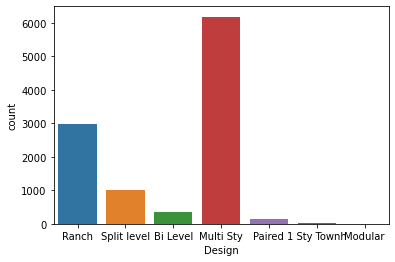

In [61]:
sns.countplot(x=X['Design'])

<AxesSubplot:xlabel='count', ylabel='Quality'>

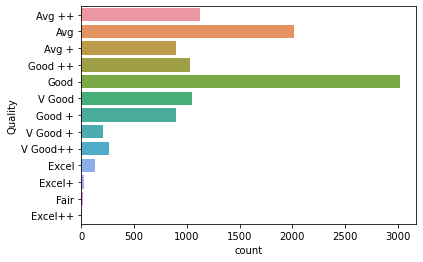

In [62]:
sns.countplot(y=X['Quality'])

<AxesSubplot:xlabel='Market Area', ylabel='count'>

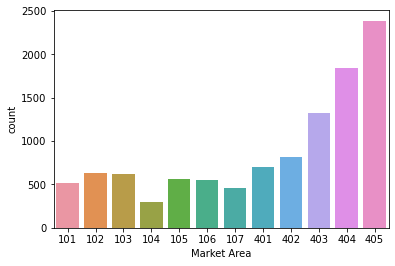

In [63]:
sns.countplot(x=X['Market Area'])

<AxesSubplot:xlabel='Location', ylabel='count'>

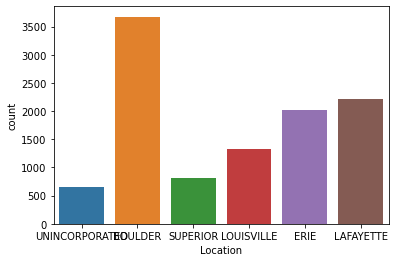

In [64]:
sns.countplot(x=X['Location'])

Let's look at X closely. 

In [65]:
X.head()

,Accout Number,Property Type,Property Address Street Number,Property Address Street Dir,Property Address Street Name,Property Address Street Suffix,Property Address Unit Number,Location,Design,Quality,...,Basemt Fin SF,Basemt Unf SF,Garage Type,Garage SF,Est Land SF,Reception No,Sale Date (Mon-Yr),Sale Price,Time Adjust Sales Price,Market Area
0,R0055558,SFR,5612,N,71ST,ST,NaN,UNINCORPORATED,Ranch,Avg ++,...,0,0,Attached,420,29780,3624229,2017-11-03,517000,581143.136625,401
1,R0055558,SFR,5612,N,71ST,ST,NaN,UNINCORPORATED,Ranch,Avg ++,...,0,0,Attached,420,29780,3654908,2018-05-10,597000,652607.758723,401
2,R0038733,SFR,4475,NaN,ABERDEEN,CT,NaN,UNINCORPORATED,Ranch,Avg,...,1050,0,Attached,475,14234,3720226,2019-06-21,531000,553206.861188,401
3,R0039073,SFR,4507,NaN,ABERDEEN,PL,NaN,UNINCORPORATED,Split level,Avg ++,...,500,0,Attached,475,8315,3747660,2019-11-06,484000,495706.522160,401
4,R0038934,SFR,4530,NaN,ABERDEEN,PL,NaN,UNINCORPORATED,Split level,Avg,...,500,0,Attached,475,10350,3663881,2018-06-29,530000,576679.694605,401


Let's expore if we have any missing data

In [51]:
missing = X.isnull().sum()
missing = missing[missing > 0]
print(missing.shape)
#missing.sort_values(inplace=True)
#missing.plot.bar()

(6,)


In [52]:
print(X.shape)
#X.dropna(axis =0, inplace=True)
print(X.shape)

(10707, 23)
(20, 23)


We don't have any missing data. Let's check the data types. 

In [68]:
X['Garage SF'].isna().sum()

0


#### 1. Change 'Garage SF' to an int

#### 2. We want to recode location, design, quality, garage type  as categorical variables things like 

In [69]:
X['Garage SF'] = X['Garage SF'].str.replace(r'\D+', '').astype(int)

/var/folders/93/rlhghy792jqb_shw4fl2xbn80000gn/T/ipykernel_3667/576785893.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X['Garage SF'] = X['Garage SF'].str.replace(r'\D+', '').astype(int)


ValueError: cannot convert float NaN to integer

In [26]:
X['Garage SF'] = X['Garage SF'].astype(str).astype(int) 

ValueError: invalid literal for int() with base 10: '1,321'

In [36]:
X.dtypes

Accout Number                             object
Property Type                             object
Property Address Street Number             int64
Property Address Street Dir               object
Property Address Street Name              object
Property Address Street Suffix            object
Property Address Unit Number              object
Location                                  object
Design                                    object
Quality                                   object
Eff Yr Built                               int64
Above Grd SF                               int64
Basemt Tot SF                              int64
Basemt Fin SF                              int64
Basemt Unf SF                              int64
Garage Type                               object
Garage SF                                  int64
Est Land SF                                int64
Reception No                               int64
Sale Date (Mon-Yr)                datetime64[ns]
Sale Price          

So we confirmed that 'Garage SF' is now numeric. Let's check unique values for Location, Design, Quality, Garage Type

Let's check if data has any duplicates.

In [43]:
X[X.duplicated(subset=None, keep='first')]

,Accout Number,Property Type,Property Address Street Number,Property Address Street Dir,Property Address Street Name,Property Address Street Suffix,Property Address Unit Number,Location,Design,Quality,...,Basemt Unf SF,Garage Type,Garage SF,Est Land SF,Reception No,Sale Date (Mon-Yr),Sale Price,Time Adjust Sales Price,Market Area,Unincorporated


In [ ]:
No duplicates detected. Very nice. 

In [ ]:
X.to_csv('data/clean_data.csv', index=False)